# Tarea 3
Usando los últimos dos años de la serie de valores de las acciones de Apple Inc. construir:
1. Un **df** con la información extraída de Yahoo Finance
2. Guardar el df en un archivo .csv en disco
3. De la variable 'Close' calcular las estadísticas
4. De la variable 'Close' hacer una tabla de frecuencias
5. De la variable 'Close' hacer un histograma
6. De las variables 'Open' y 'Close' desplegar simultáneamente las series temporales 

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import datetime as dt 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pandas_datareader import data

# Lectura de .csv's de diversas fuentes. En este caso, Yahoo Finance
df_apple = pd.read_csv('/content/drive/MyDrive/Datasets/AAPL.csv', index_col='Date', parse_dates=True)
df_apple.to_csv('//content/drive/MyDrive/Datasets/AAPL_corregido.csv', index=True)

In [24]:
df_apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-25,124.697502,125.180000,123.052498,124.824997,124.027283,211495600
2020-08-26,126.180000,126.992500,125.082497,126.522499,125.713928,163022400
2020-08-27,127.142502,127.485001,123.832497,125.010002,124.211098,155552400
2020-08-28,126.012497,126.442497,124.577499,124.807503,124.009895,187630000
2020-08-31,127.580002,131.000000,126.000000,129.039993,128.215347,225702700


In [25]:
df_apple['Close'].describe()

count    253.000000
mean     128.240494
std       10.550396
min      106.839996
25%      120.709999
50%      127.099998
75%      134.320007
max      151.119995
Name: Close, dtype: float64

In [29]:
def tabla_frec(x, clases=True, n_clases=None):
  import math
  import pandas as pd

  xx = x[(x.isnull() == False)].copy() # Elimina los nulos de la tabla 
  n_total = len(xx) # Total de valores a tabular
  nn_clases = None # Inicializa el número de clases
  if clases:
    # Si deben construirse intervalos de clase
    if n_clases is None:
      # Aplíquese la regla de Sturges
      nn_clases = int(round(1+3.322*math.log10(n_total),0))
    else:
      # Tómese el número de clases indicado
      nn_clases = n_clases
    # Función clave del proceso que asigna intervalos de clase a cada
    # valor de xx
    xx, bins = pd.cut(xx, bins=nn_clases, right=False, retbins=True, include_lowest=True, duplicates='drop')
    # Tabulación cruzada de los intervalos de clase y las frecuencias
    df_freq = pd.crosstab(index=xx, columns="f")
    # Agregando el resto de las frecuencias necesarias
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)
    # Agregando la marca de clase
    mc = []
    for i in range(len(bins)-1):
      mc.append(round((bins[i]+bins[i+1])/2,2))
    df_freq['mc'] = mc
  else:
    # Si NO deben construirse intervalos de clase
    # Tabulación cruzada directa, en este caso.
    df_freq = pd.crosstab(index=xx, columns="f")
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)
    # No son necesarias las marcas de clase

  # Devolvemos el número de clases formadas y la tabla de frecuencias
  return nn_clases, df_freq;



# Tabla de frecuencias para la variable Estatura
n_clases_estat, tab_estat = tabla_frec(df_apple['Close'])
# Esta instrucción es importante si se desea que los nombres de las
# filas (en este caso, los intervalos de clase) pasen a ser una columna
# del df.
# tab.reset_index(inplace=True)
print(tab_estat.to_latex()) # Escribir como una tabla LaTeX

\begin{tabular}{lrrrrr}
\toprule
col\_0 &   f &    F &       fr &       Fr &      mc \\
Close            &     &      &          &          &         \\
\midrule
[106.84, 111.76) &   9 &    9 &  0.03557 &  0.03557 &  109.30 \\
[111.76, 116.68) &  30 &   39 &  0.11858 &  0.15415 &  114.22 \\
[116.68, 121.6)  &  36 &   75 &  0.14229 &  0.29644 &  119.14 \\
[121.6, 126.52)  &  44 &  119 &  0.17391 &  0.47036 &  124.06 \\
[126.52, 131.44) &  43 &  162 &  0.16996 &  0.64032 &  128.98 \\
[131.44, 136.36) &  41 &  203 &  0.16206 &  0.80237 &  133.90 \\
[136.36, 141.28) &  10 &  213 &  0.03953 &  0.84190 &  138.82 \\
[141.28, 146.2)  &  20 &  233 &  0.07905 &  0.92095 &  143.74 \\
[146.2, 151.164) &  20 &  253 &  0.07905 &  1.00000 &  148.68 \\
\bottomrule
\end{tabular}



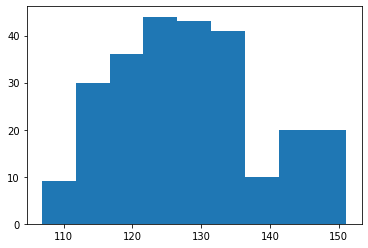

In [14]:
import math
nn_bins = int(round(1+3.322*math.log10(len(df_apple['Close'])),0))
plt.hist(df_apple['Close'], bins=nn_bins)
plt.show()

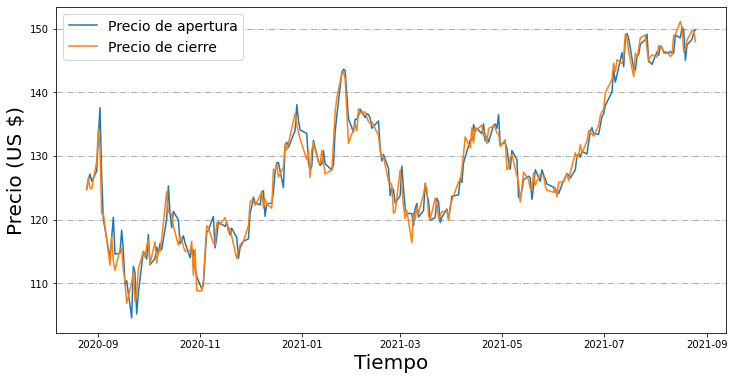

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df_apple['Open'])
plt.plot(df_apple['Close'])
plt.legend(['Precio de apertura','Precio de cierre'], fontsize=14)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Precio (US $)', fontsize=20)
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()